### Problem 1: Perceptron Learning 

The dataset `lab02_dataset_1.csv` has a *3-dimensional input space* and a class label of *Positive* and *Negative*. For this task, you are **not allowed** to use any *functionalities* of the `sklearn` module.

### 1.a

Write a function `my_perceptron()` which applies the perceptron algorithm (refer to the lecture slide covering linear separators for details of this algorithm) on the dataset to create a linear separator. `my_perceptron()` takes the dataset as its input and returns a ***3-dimensional weight vector*** which can be used to create the linear separator (assume `bias = 0`). Use the *initial weights* `w = [3.5,0.5,-2.5]`. Use a classification threshold of `99%` i.e., `my_perceptron()` will terminate once the misclassification rate is less than `1%`.

In [1]:
import numpy as np
import pandas as pd

def my_perceptron(data):
    w = np.array([3.5, 0.5, -2.5])

    misclassification_rate = 1.0

    while misclassification_rate >= 0.01:
        misclassified = 0
        for index, row in data.iterrows():
            X = np.array([row['X'], row['Y'], row['Z']])
            y_true = 1 if row['Class'] == 'Positive' else -1

            y_pred = np.dot(w, X)

            if y_pred >= 0:
                y_pred = 1
            else:
                y_pred = -1

            if y_pred != y_true:
                w += y_true * X
                misclassified += 1

        misclassification_rate = misclassified / len(data)

    return w

data = pd.read_csv('lab02_dataset_1.csv')

data = data.dropna()

weights = my_perceptron(data)

print("Final weight vector:", weights)

Final weight vector: [0.14536582 2.30319913 0.34978878]


### 1.b

Create a *3D plot* which showcases the dataset in a 3D-space alongwith the *linear separator* you obtained from `my_perceptron()`. Use two different colors to represent the data points belonging in the two classes for ease of viewing.

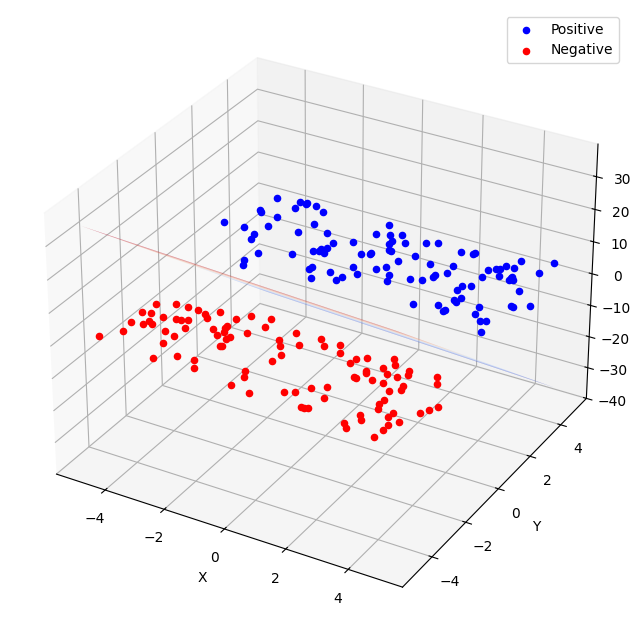

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('lab02_dataset_1.csv')
data = data.dropna()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for index, row in data.iterrows():
    if row['Class'] == 'Positive':
        ax.scatter(row['X'], row['Y'], row['Z'], color='blue')
    else:
        ax.scatter(row['X'], row['Y'], row['Z'], color='red')

ax.scatter([], [], [], color='blue', label='Positive')
ax.scatter([], [], [], color='red', label='Negative')

xx, yy = np.meshgrid(np.linspace(data['X'].min(), data['X'].max(), 10),
                     np.linspace(data['Y'].min(), data['Y'].max(), 10))

zz = (-weights[0] * xx - weights[1] * yy) / weights[2]

ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='coolwarm')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()


### Problem 2: Naive Bayes Classification

`lab02_dataset_2.xlsx` contains 10,302 observations on various vehicles. You will use the observations in this dataset to train models that predict the usage of a vehicle. The input features which will be used for your training are *CAR_TYPE, OCCUPATION, EDUCATION* and your output label is the binary class *CAR_USE*, whose values are *Private* and *Commercial*.

### 2.a

i. Encode the categorical features as an integer array. Look up which sklearn function will allow you to do that and apply that on the input features.<br>
ii. Also, remember to standardize your encoded features using `fit_transform` to create your final dataset.<br>
iii. Train a naive bayes model using sklearn's [`CategoricalNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) with a laplace smoothing of 0.25.

In [11]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

data = pd.read_excel('lab02_dataset_2.xlsx', sheet_name='claim_history')

features = data[['CAR_TYPE', 'OCCUPATION', 'EDUCATION']]
target = data['CAR_USE']

encoder = OrdinalEncoder()
encoded_features = encoder.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.3)

# model = CategoricalNB(alpha=1)
# model.fit(X_train, y_train)

# accuracy = model.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

from sklearn.naive_bayes import CategoricalNB
import numpy as np

alpha_values = [0.001,0.01,0.1,1,10,100,1000]

best_accuracy = 0
best_alpha = 0

for alpha in alpha_values:
    model = CategoricalNB(alpha=alpha)
    
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    
    print(f"Alpha: {alpha:.4f}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print(f"\nBest Alpha: {best_alpha:.4f}, Best Accuracy: {best_accuracy:.4f}")


Alpha: 0.0010, Accuracy: 0.8690
Alpha: 0.0100, Accuracy: 0.8690
Alpha: 0.1000, Accuracy: 0.8690
Alpha: 1.0000, Accuracy: 0.8690
Alpha: 10.0000, Accuracy: 0.8690
Alpha: 100.0000, Accuracy: 0.8732
Alpha: 1000.0000, Accuracy: 0.7965

Best Alpha: 100.0000, Best Accuracy: 0.8732


### 2.b

For each observation, you will calculate the predicted probabilities for `CAR_USE = Commercial` and `CAR_USE = Private`.  You will classify the observation in the `CAR_USE` category that has the highest predicted probability. In case of ties, choose `Private` category as the output.


Output the Class counts and Probabilities $P(Y_j)$. Also display the probability of the input variables, given each output label $P(X_i|Y_j)$ alongwith their counts.

In [4]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

data = pd.read_excel('lab02_dataset_2.xlsx', sheet_name='claim_history')

features = data[['CAR_TYPE', 'OCCUPATION', 'EDUCATION']]
target = data['CAR_USE']

encoder = OrdinalEncoder()
encoded_features = encoder.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.3, random_state=42)

model = CategoricalNB(alpha=0.25)
model.fit(X_train, y_train)


predicted_probabilities = model.predict_proba(X_test)

class_labels = model.classes_

predicted_labels = []
for i, probs in enumerate(predicted_probabilities):
    if probs[0] == probs[1]:
        predicted_labels.append('Private')
    else:
        predicted_labels.append(class_labels[probs.argmax()])  

predicted_df = pd.DataFrame({
    'Predicted_Class': predicted_labels
})

class_counts = predicted_df['Predicted_Class'].value_counts()
class_probabilities = class_counts / len(predicted_labels)

print("Class Counts (Predicted):")
print(class_counts)

print("\nClass Probabilities P(Yj):")
print(class_probabilities)

feature_names = features.columns
for i, feature in enumerate(feature_names):
    print(f"\nFeature: {feature}")

    decoded_X_test = pd.DataFrame(encoder.inverse_transform(X_test), columns=features.columns)

    result = pd.concat([decoded_X_test, pd.DataFrame(predicted_labels, columns=['Predicted_Class'])], axis=1)

    feature_counts = result.groupby(['Predicted_Class', feature]).size().unstack(fill_value=0)
    feature_probabilities = feature_counts.div(feature_counts.sum(axis=1), axis=0)

    print("Counts:")
    print(feature_counts)

    print("\nProbabilities P(Xi|Yj):")
    print(feature_probabilities)


Class Counts (Predicted):
Predicted_Class
Private       1970
Commercial    1121
Name: count, dtype: int64

Class Probabilities P(Yj):
Predicted_Class
Private       0.637334
Commercial    0.362666
Name: count, dtype: float64

Feature: CAR_TYPE
Counts:
CAR_TYPE         Minivan  Panel Truck  Pickup  SUV  Sports Car  Van
Predicted_Class                                                    
Commercial           175          256     332  143          48  167
Private              614            0     213  722         313  108

Probabilities P(Xi|Yj):
CAR_TYPE          Minivan  Panel Truck    Pickup       SUV  Sports Car  \
Predicted_Class                                                          
Commercial       0.156111     0.228368  0.296164  0.127565    0.042819   
Private          0.311675     0.000000  0.108122  0.366497    0.158883   

CAR_TYPE              Van  
Predicted_Class            
Commercial       0.148974  
Private          0.054822  

Feature: OCCUPATION
Counts:
OCCUPATION    

### 2.c 

Let us study a couple of fictitious persons (test cases).<br>
Person 1 works in a `Blue Collar` occupation, has an education level of `PhD`, and owns an `SUV`.<br>
Person 2 works in a `Manager` occupation, has a `Below High Sc` level of education, and owns a `Sports Car`.<br>

What are the `Car Usage` probabilities of both these people? Display a datraframe that captures all the above information, alongwith two additional columns which will display the `Car Use` probabilities of both these people.

In [5]:
import pandas as pd
import numpy as np

test_data = pd.DataFrame({
    'CAR_TYPE': ['SUV', 'Sports Car'],
    'OCCUPATION': ['Blue Collar', 'Manager'],
    'EDUCATION': ['PhD', 'Below High Sc']
})

encoded_test_data = encoder.transform(test_data[['CAR_TYPE', 'OCCUPATION', 'EDUCATION']])

probabilities = model.predict_proba(encoded_test_data)

test_data['CAR_USE_Private_Probability'] = probabilities[:, 0]
test_data['CAR_USE_Commercial_Probability'] = probabilities[:, 1]

print(test_data)


     CAR_TYPE   OCCUPATION      EDUCATION  CAR_USE_Private_Probability  \
0         SUV  Blue Collar            PhD                     0.511700   
1  Sports Car      Manager  Below High Sc                     0.052125   

   CAR_USE_Commercial_Probability  
0                        0.488300  
1                        0.947875  


### 2.d

Generate a histogram of the predicted probabilities of `CAR_USE = Private` using the `CategoricalNB` model.  The bin width is 0.05.  The vertical axis is the proportion of **all the observations** (all observations imply the entire training dataset).

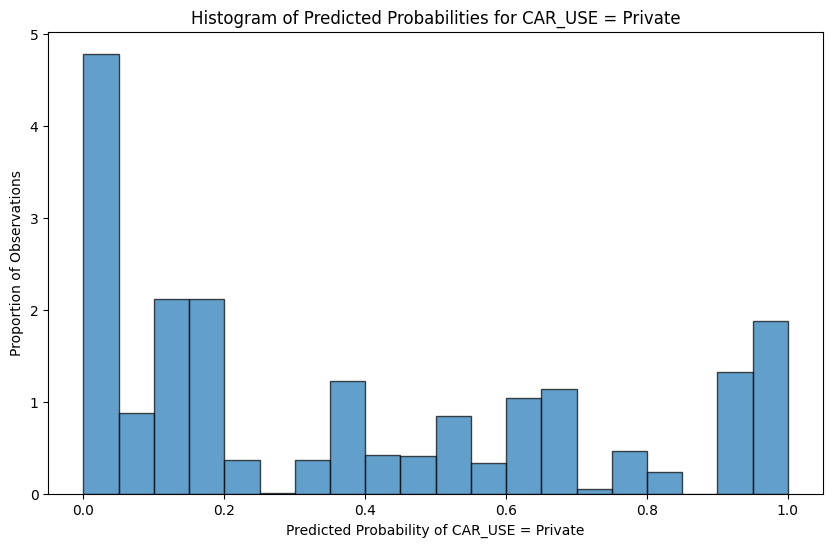

In [6]:
import matplotlib.pyplot as plt

probabilities = model.predict_proba(encoded_features)

private_probabilities = probabilities[:, 0]

plt.figure(figsize=(10, 6))
plt.hist(private_probabilities, bins=np.arange(0, 1.05, 0.05), density=True, edgecolor='black', alpha=0.7)

plt.xlabel('Predicted Probability of CAR_USE = Private')
plt.ylabel('Proportion of Observations')
plt.title('Histogram of Predicted Probabilities for CAR_USE = Private')

plt.show()


### 2.e 

Using a classification threshold of 0.6 i.e., the class with a `probability >= 0.6` is the correct output, what is the misclassification rate (computed on **all the observations**) of the `CategoricalNB` model?

In [7]:
import numpy as np

probabilities = model.predict_proba(encoded_features)

predictions = np.where(probabilities[:, 0] >= 0.6, 'Private', 'Commercial')

misclassified = (predictions != target).sum()
misclassification_rate = misclassified / len(target)

print(f"Misclassification Rate: {misclassification_rate:.4f}")

Misclassification Rate: 0.8679


### Problem 3: Logistic Regression Classification

`lab02_dataset_3.csv` contains 45,000 observations on loan details. You will use the observations in this dataset to train models that predict the status of a loan. The output label is the binary class *loan_status*, whose values are 0 and 1.

### 3.a 

i. Use only the 8 numerical features as the input (ignore the categorical features).<br>
ii. Use sklearn's [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and `fit_transform` to transform the input features.<br>
iii. Then apply a train-test split of 80-20 to generate the training and testing sets.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('lab02_dataset_3.csv')

numerical_features = data[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                           'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

target = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (36000, 8)
Test set size: (9000, 8)


### 3.b 

Train a model using sklearn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and output the classification score.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_model = LogisticRegression(max_iter=1000)  
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Classification Score (Accuracy):", accuracy)


Classification Score (Accuracy): 0.8244444444444444


### 3.c

Compute the coefficients of the logistic regression model. What are the three most important features (features with the largest positive/negative coefficients are the most relevant)?

In [10]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

coefficients = logreg_model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': numerical_features.columns,
    'Coefficient': coefficients
})

sorted_coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Top 3 Most Important Features:")
print(sorted_coef_df.head(3))


Top 3 Most Important Features:
               Feature  Coefficient
5  loan_percent_income     1.352786
4        loan_int_rate     0.994069
3            loan_amnt    -0.670417


Three most important features:

1.   loan_percent_income
2.   loan_int_rate
3.   loan_amnt



### 3.d

Create a correlation heatmap using the three most important features and the output.

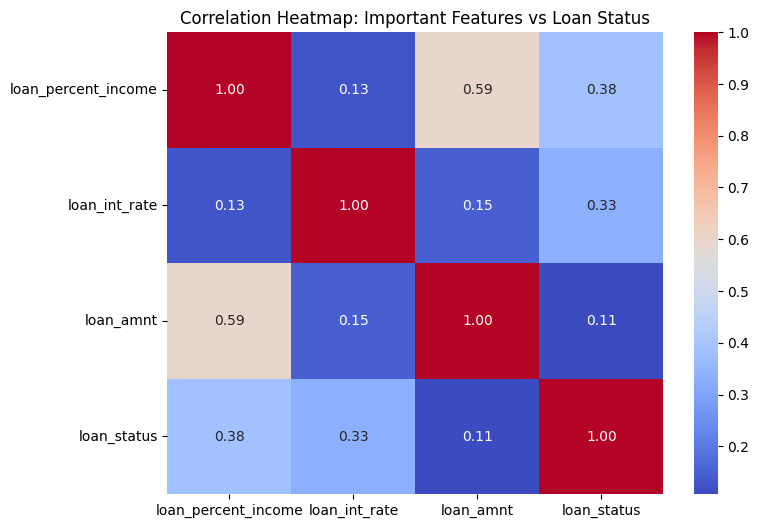

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

important_features = ['loan_percent_income', 'loan_int_rate', 'loan_amnt', 'loan_status']
subset_data = data[important_features]

corr_matrix = subset_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Heatmap: Important Features vs Loan Status')

plt.show()


### 3.e

Can we possibly improve the classification score? In the previous implementation, we completely ignored all the categorial features, so let us identify which of those categorical features can be used for improving performance. Encode the categorical features in such a way that it does not increase the number of columns in the original dataframe. Display the encoded dataframe.

In [14]:
from sklearn.preprocessing import OrdinalEncoder

categorical_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

encoder = OrdinalEncoder()

encoded_categorical_features = encoder.fit_transform(data[categorical_features])

encoded_data = data.copy()
encoded_data[categorical_features] = encoded_categorical_features

print(encoded_data.head())


   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0            0.0               4.0        71948.0               0   
1        21.0            0.0               3.0        12282.0               0   
2        25.0            0.0               3.0        12438.0               3   
3        23.0            0.0               1.0        79753.0               0   
4        24.0            1.0               4.0        66135.0               1   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                    3.0    35000.0          4.0          16.02   
1                    2.0     1000.0          1.0          11.14   
2                    0.0     5500.0          3.0          12.87   
3                    3.0    35000.0          3.0          15.23   
4                    3.0    35000.0          3.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                    

### 3.f 

Re-create the correlation heatmap now using the encoded categorical features and the output. Choose three features with the highest correlation coefficient with the output class and add them to the original input features from 3.a. Remember, highest correlation coefficient takes into account the largest absolute values irrespective of positive or negative.

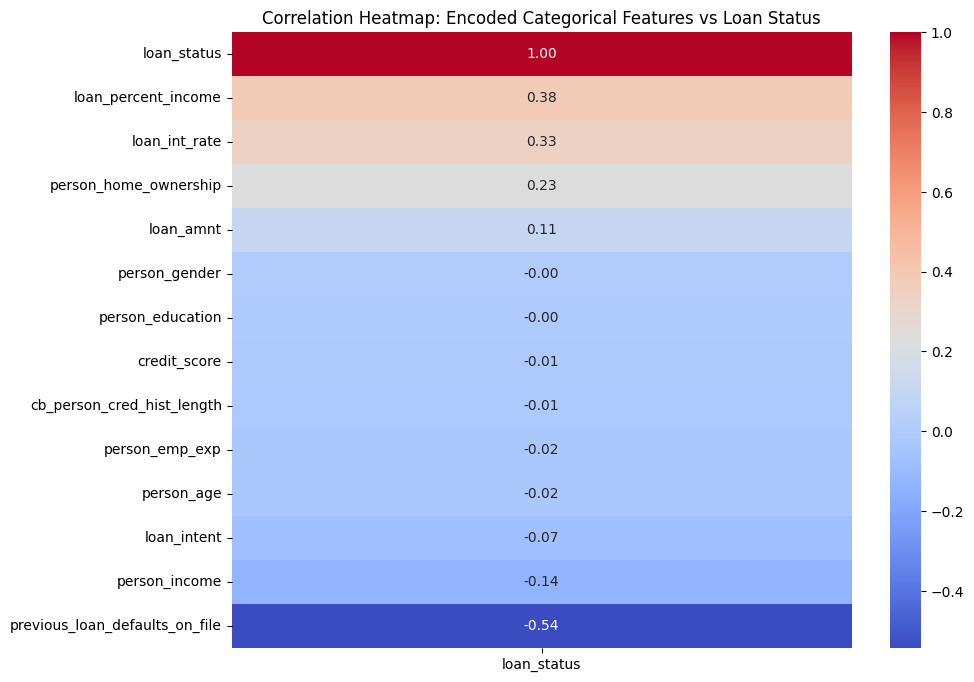

Top 3 Categorical Features with highest correlation:
Index(['previous_loan_defaults_on_file', 'loan_percent_income',
       'loan_int_rate'],
      dtype='object')

Final Selected Features:
['loan_percent_income', 'loan_int_rate', 'loan_amnt', 'previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate']


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['loan_status']].sort_values(by='loan_status', ascending=False), 
            annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Heatmap: Encoded Categorical Features vs Loan Status')

plt.show()

correlations = corr_matrix['loan_status'].abs().sort_values(ascending=False)
top_3_categorical_features = correlations.index[1:4] 

print("Top 3 Categorical Features with highest correlation:")
print(top_3_categorical_features)

final_features = ['loan_percent_income', 'loan_int_rate', 'loan_amnt'] + list(top_3_categorical_features)

print("\nFinal Selected Features:")
print(final_features)

### 3.g

Re-train the logistic regression model with the updated input features and compute the classification score.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

input_features = ['person_age', 'person_income', 'person_emp_exp', 
                  'cb_person_cred_hist_length', 'credit_score',
                  'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                  'previous_loan_defaults_on_file']  

X = encoded_data[input_features]
y = encoded_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(solver='liblinear',max_iter=2000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Classification Score (Accuracy):", accuracy)

Classification Score (Accuracy): 0.8268888888888889
